# Clustering Countries based on Socio-Economic Factors

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.<br>
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. <br>
And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most

## Data Understanding and Cleaning

In [1]:
# Import necessary modules for data analysis and data visualization. 
import pandas as pd
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

## Some other snippit of codes to get the setting right 
%matplotlib inline 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

In [2]:
#creating a function for count of missing values and % of missing values for d1 dataframe
def missing_data(d1):
    missing_data1 = pd.DataFrame(round(d1.isnull().sum().sort_values(ascending=False)/len(d1.index)*100,2), columns=['% of missing value'])
    missing_data1['Count of Missing Values'] = d1.isnull().sum()
    return missing_data1

In [3]:
#loading the data
country = pd.read_csv('Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country.shape

(167, 10)

In [5]:
#checking the information
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [6]:
#checking missing values
missing_data(country)

,% of missing value,Count of Missing Values
gdpp,0.0,0
total_fer,0.0,0
life_expec,0.0,0
inflation,0.0,0
income,0.0,0
imports,0.0,0
health,0.0,0
exports,0.0,0
child_mort,0.0,0
country,0.0,0


In [7]:
#checking for any null value
country.isnull().any().sum()

0

As we can see out data does not contain any missing value

In [8]:
#checking for duplicate records
country[country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


We can se there is no duplicate records in data

In [9]:
#converting exports, imports and health to actual values by formula provided by TA in discussion forum
    country['exports'] = country['exports']*country['gdpp']/100
country['imports'] = country['imports']*country['gdpp']/100
country['health'] = country['health']*country['gdpp']/100

In [10]:
#getting summary statistics of the data
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Outlier Analysis and EDA

In [11]:
#checking for outliers
country.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


As we can see there are some outliers in data, values after 99th percentile increases rapidly. Lets see each of them and find out if they belongs to same countries.

In [12]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [13]:
#getting the names of the countries which are exceeding 99th quantiles
cols = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for col in cols:
    print('Countries exceeding',col,'99th quantile:')
    display(country[country[col] > country[col].quantile(0.99)])
    print('-'*50)

Countries exceeding child_mort 99th quantile:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399


--------------------------------------------------
Countries exceeding exports 99th quantile:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600


--------------------------------------------------
Countries exceeding health 99th quantile:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
145,Switzerland,4.5,47744.0,8579.0,39761.8,55500,0.317,82.2,1.52,74600
159,United States,7.3,6001.6,8663.6,7647.2,49400,1.220,78.7,1.93,48400


--------------------------------------------------
Countries exceeding imports 99th quantile:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600


--------------------------------------------------
Countries exceeding income 99th quantile:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.62,81.3,1.63,105000
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.98,79.5,2.07,70300


--------------------------------------------------
Countries exceeding inflation 99th quantile:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,3847.50,662.850,2376.00,16500,45.9,75.4,2.47,13500


--------------------------------------------------
Countries exceeding life_expec 99th quantile:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.900,82.8,1.39,44500
133,Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600


--------------------------------------------------
Countries exceeding total_fer 99th quantile:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348


--------------------------------------------------
Countries exceeding gdpp 99th quantile:


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.62,81.3,1.63,105000
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.95,81.0,1.95,87800


--------------------------------------------------


As we can see for all the parameters , no single or group of countries is common in the above list, that means some parameter is high for some country and some other parameter is low for that country so, we cant consider any country outlier in this case.


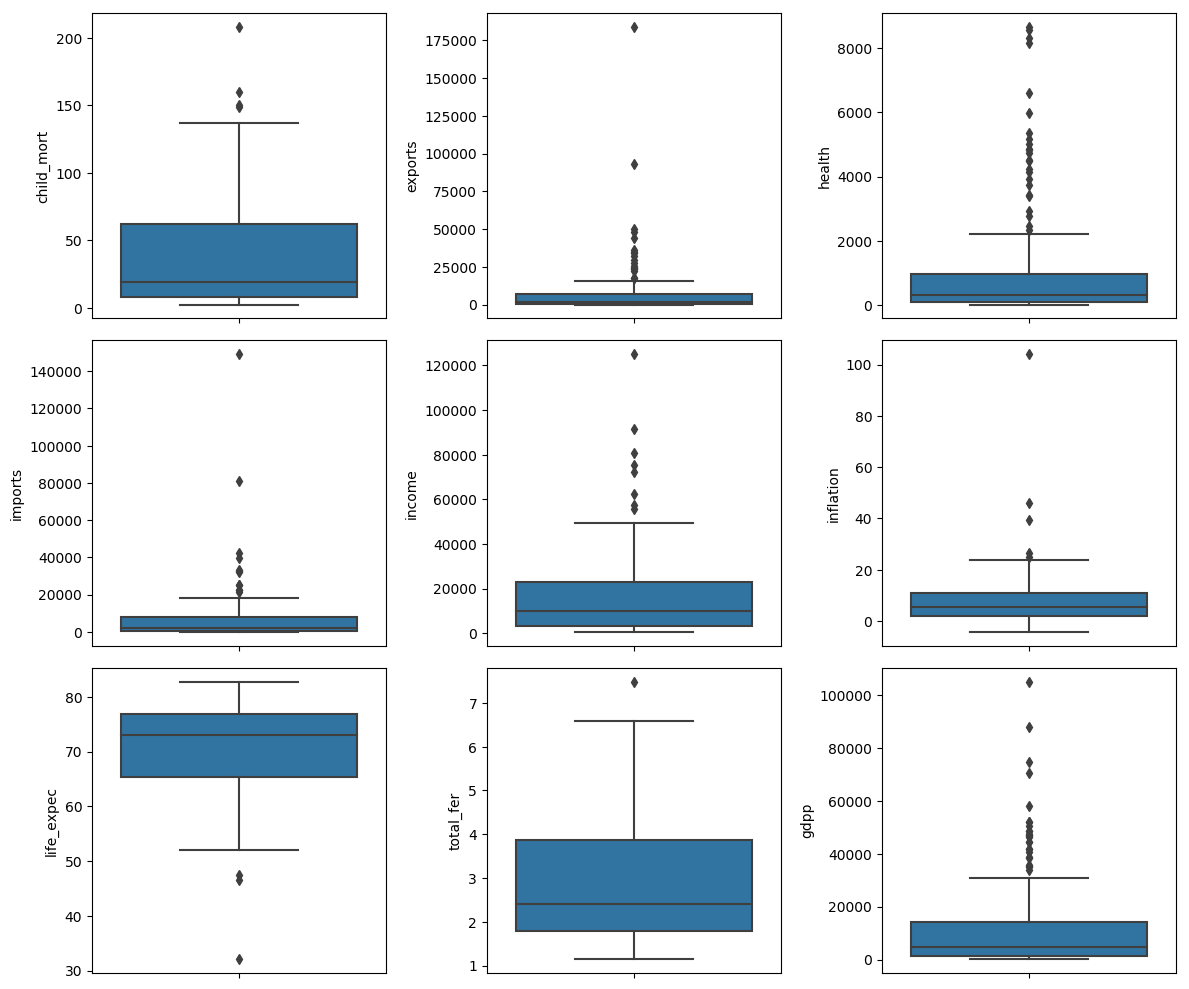

In [14]:
#creating boxplots for all the parameters
plt.figure(figsize=(12,10), dpi=100)
i = 1
for col in cols:
    
    plt.subplot(3,3,i)
    sns.boxplot(y=country[col])
    i = i+1
plt.tight_layout()    
plt.show()

Based on the above box plots and data from outlier analysis, i found following points :
- Child mortality rate is high in Haiti and Sierra Leone.
- Quatar and Luxembourg have highest Net income per person respectively.
- Inflation is very high in Nigeria and Venezuela.
- Life expectancy is lowest in Haiti

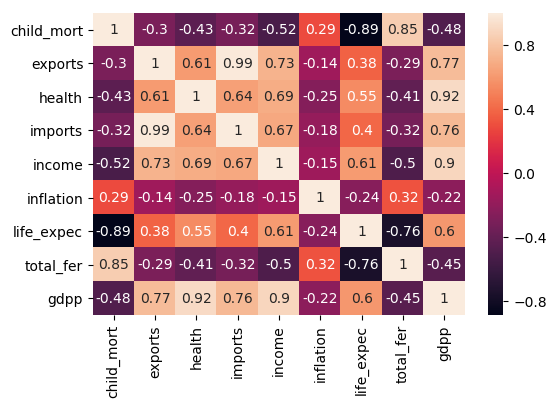

In [15]:
#visualizing heatmap and finding coorelated features
plt.figure(dpi= 100)
sns.heatmap(country.corr(), annot=True)
plt.show()

- Income is highly correlated with gdpp
- total_fer is highly negatively correlated with life_expec
- total_fer is highly correlated with child_mort
- life_expec is highly negatively correlated with child_mort

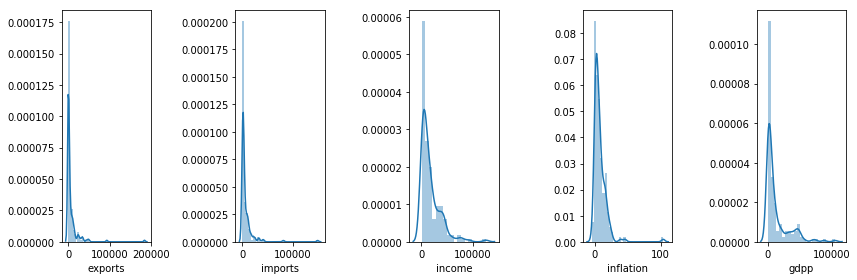

In [16]:
#visualizing distribution of some economic variables
plt.figure(figsize=(12,4))
cols = ['exports', 'imports', 'income', 'inflation','gdpp']
i = 1
for col in cols:
    plt.subplot(1,5,i)
    sns.distplot(country[col])
    i = i+1
plt.tight_layout()
plt.show()

In [17]:
#Lets create a new metric based on income for EDA purpose
def income(x):
    if x <= 3000:
        return 'Very Poor Income'
    elif x > 3000 and x <= 15000:
        return 'Poor Income'
    elif x > 15000 and x <= 40000:
        return 'Middle Income'
    elif x > 40000 and x <= 60000:
        return 'High Income'
    else:
        return 'Very High Income'

In [18]:
country['income_group'] = country['income'].apply(income)

In [19]:
#checking the count of values
country['income_group'].value_counts()

Poor Income         62
Middle Income       46
Very Poor Income    38
High Income         15
Very High Income     6
Name: income_group, dtype: int64

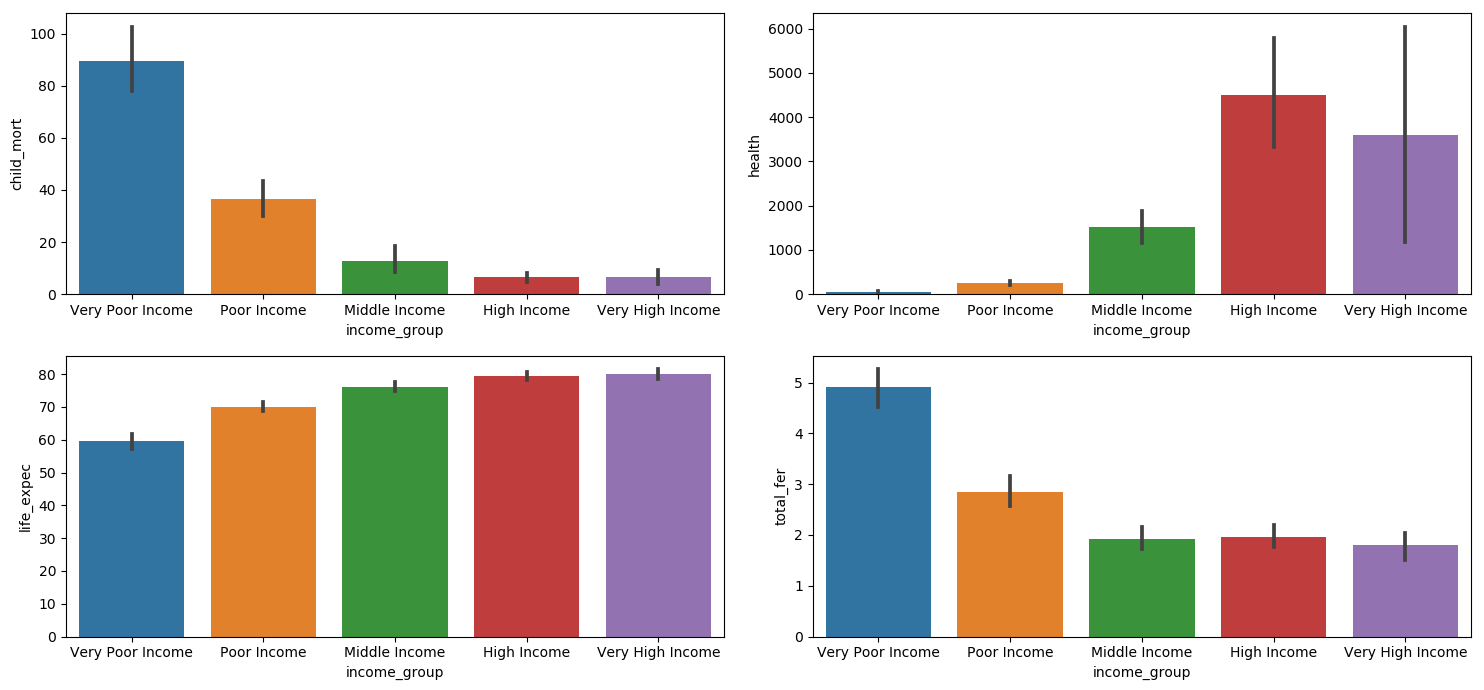

In [20]:
#visualizing socioeconomic factors based on income of countries
cols = ['child_mort', 'health','life_expec', 'total_fer']
i = 1
plt.figure(figsize=(15,7), dpi=100)
for col in cols:
    plt.subplot(2,2,i)
    sns.barplot(x=country['income_group'],y=country[col])
    i=i+1
plt.tight_layout()
plt.show()

We can see following pattern from the above charts:
- As the income increases , people can invest more in health and good nutrition food and as a consequences child mortality rate decreases and life expectancy increases.
- As the income increases , people also spend more on education and learn repurcussions of poplation growth, so reducing total fertility means producing less babies.

## Scaling the features

In [21]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_group
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Very Poor Income
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Poor Income
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Poor Income
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Poor Income
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Middle Income


In [22]:
#removing the country and income_group and creating the new dataframe
data = country.drop(['country','income_group'], axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [23]:
cols = data.columns

In [24]:
#importing Standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
#scaling the data
data = scaler.fit_transform(data)

In [26]:
#converting numpy array back into dataframe
data = pd.DataFrame(data, columns=cols)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [27]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-2.659217e-17,9.174298e-17,-2.260334e-17,3.589943e-17,-7.512288e-17,8.376533e-17,3.616535e-16,3.124580e-16,2.127373e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-8.871383e-01,-4.140371e-01,-5.812404e-01,-4.491604e-01,-8.603259e-01,-1.137852e+00,-4.337186e+00,-1.191250e+00,-6.968005e-01
25%,-7.466190e-01,-3.891452e-01,-5.446513e-01,-4.055539e-01,-7.174558e-01,-5.666409e-01,-5.927576e-01,-7.639023e-01,-6.366596e-01
50%,-4.717981e-01,-3.149097e-01,-4.091560e-01,-3.097338e-01,-3.738080e-01,-2.269504e-01,2.869576e-01,-3.564309e-01,-4.544309e-01
75%,5.926666e-01,-7.958645e-03,-4.442811e-02,7.713036e-02,2.942370e-01,2.816364e-01,7.042584e-01,6.175252e-01,5.942100e-02
max,4.221297e+00,9.839814e+00,4.235432e+00,9.716681e+00,5.611542e+00,9.129718e+00,1.380962e+00,3.009349e+00,5.036507e+00


As we can see our data has a mean of nearly zero and standard deviation of 1

## PCA

In [28]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [29]:
#performing the PCA on data
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [30]:
#checking the principle components
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

Let's plot the principal components and try to make sense of them <br>
We'll plot original features on the first 2 principal components as axes

In [31]:
colnames = list(data.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.316392,0.476267,child_mort
1,0.342887,0.397311,exports
2,0.358535,0.155053,health
3,0.344865,0.370781,imports
4,0.380041,0.128384,income


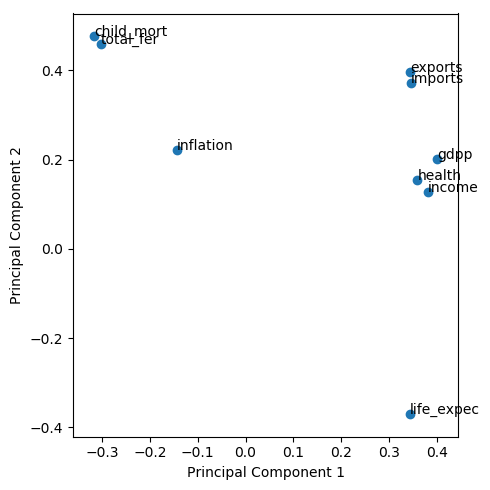

In [32]:
%matplotlib inline
fig = plt.figure(figsize = (5,5),dpi=100)
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

We can see that life_expec has a higher loading in Principal component 1 , imports and exports have high loadings in both imports and exports. While child_mort and total_fer has high loadings in PC2.

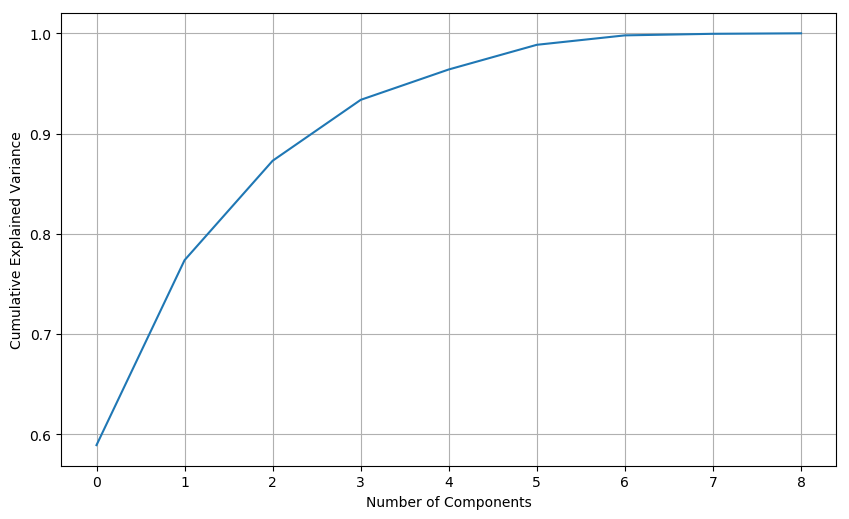

In [33]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (10,6), dpi=100)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

We can see from the above screeplot, 4 Principle components are enough to explain about 95% variance in the data, so taking k=4

In [34]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [35]:
#Basis transformation - getting the data onto our PCs
data_pca = pca_final.fit_transform(data)
data_pca.shape

(167, 4)

In [36]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(data_pca.transpose())

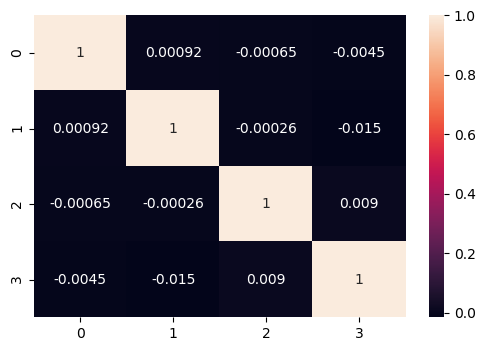

In [37]:
#plotting the correlation matrix
plt.figure(dpi=100)
sns.heatmap(corrmat,annot = True)
plt.show()

In [38]:
#checking the maximum and minimum correlation
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.008959421276881619 , min corr:  -0.015302266510759182


We can see that there is no correlation between any two principle components, hence PCA has done a great job. We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [39]:
#converting data_pca from numpy array to dataframe
data_pca = pd.DataFrame(data_pca, columns=['PC1','PC2','PC3','PC4'])
data_pca.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [40]:
#checking for outliers after PCA on PCA modified dataset
data_pca.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,PC1,PC2,PC3,PC4
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,4.520669e-17,1.994413e-17,-3.074719e-17,-9.141058e-18
std,2.310042e+00,1.292219e+00,9.468276e-01,7.407949e-01
min,-3.938184e+00,-1.700660e+00,-1.798863e+00,-4.587245e+00
25%,-1.447765e+00,-9.808471e-01,-4.013683e-01,-3.433921e-01
50%,-3.569253e-01,-3.963391e-01,-1.786846e-01,-1.356113e-01
75%,8.501015e-01,6.784442e-01,2.664755e-01,2.237735e-01
90%,2.977759e+00,1.589161e+00,9.585286e-01,7.618078e-01
95%,3.918213e+00,2.175035e+00,1.188438e+00,1.146870e+00
99%,6.374109e+00,3.310386e+00,3.073894e+00,2.019522e+00


As we can see all the values are increasing gradually, so we can conclude that there is no valid outlier in our data

## Clustring

### Hopkins Statistics

First we will check hopkins statistic and get to know whether clusters will be worth to form on this data

In [41]:
#code for hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [42]:
#Use the Hopkins Statistic function by passing the data_pca as a paramter
hopkins(data_pca)

0.8275348243872614

As we know if the value of hopkins statistic is greater than 0.5, then our data has a good tendency to form clusters, so till now we are good to go.

### K-Means Clustering

We will run the K-Means Algorithm on the data and try to find out the clusters. Let initially take K=4 clusters

In [43]:
#importing the KMeans
from sklearn.cluster import KMeans

In [44]:
#running the kmeans algorithm on data_pca
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [45]:
#getting kmeans labels
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 0,
       3, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       3, 3, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 3, 2, 2, 0, 3, 0, 0, 2, 0, 3, 3, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2])

### SSD analysis & Elbow Curve

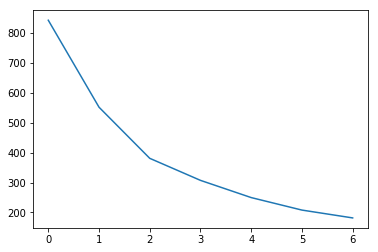

In [46]:
#elbow curve/sum of squared distances
ssd = []
range_n_clusers = [2,3,4,5,6,7,8]
for num_cluster in range_n_clusers:
    kmeans =KMeans(n_clusters=num_cluster, max_iter=50, random_state=42)
    kmeans.fit(data_pca)
    ssd.append(kmeans.inertia_)
#plot the ssd for each n_cluster    
plt.plot(ssd)

As we can see from the plot of Sum of squared distances , 3 will be best number of clusters in our case, Let also analyze Silhouette score

### Silhouette analysis

In [47]:
#we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state= 42).fit(data_pca)
    sse_.append([k, silhouette_score(data_pca, kmeans.labels_)])

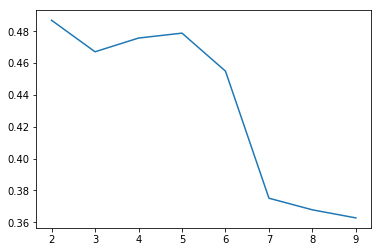

In [48]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

As we can se Silhouette score is more little less for 3 clusters than 4 clusters. So we will form 3 clusters in this case.

In [49]:
#Remodelling with 3clusters
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [50]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [51]:
#Adding these labels to data_pca and original country dataframe
data_pca['K-Means ID'] = kmeans.labels_
country['K-Means ID'] = kmeans.labels_

### Hierarchical Clustring

In [52]:
data_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'K-Means ID'], dtype='object')

In [53]:
#getting the dataset for analysis
data_pca_1 = data_pca[['PC1', 'PC2', 'PC3', 'PC4']]
data_pca_1.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.023845,-1.435816,-0.009080,-0.442921
2,-0.459260,-0.678794,0.967852,-0.176389
3,-2.723581,2.176018,0.597794,0.438919
4,0.648777,-1.026498,-0.244170,-0.267513


In [54]:
#importing necessary libraries for hierarchical clustring
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

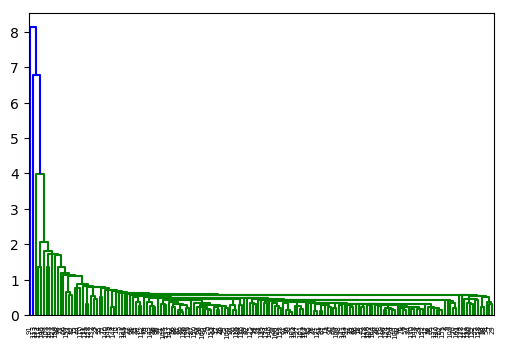

In [55]:
#Creating denderogram using single linkage
plt.figure(dpi=100)
mergings = linkage(data_pca_1,method='single', metric='euclidean')
dendrogram(mergings)
plt.show()

As we can see we got very mixed dendrogram and it is impossible to make meaningful clusters from it, so creating dendrogram using complete linkage

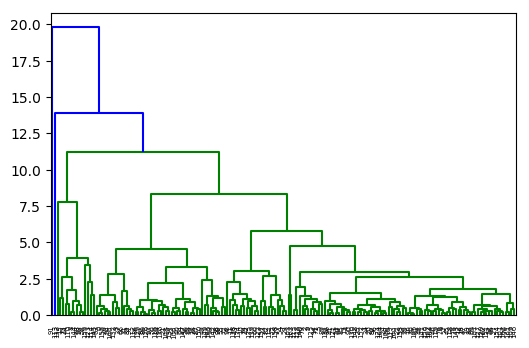

In [56]:
#Creating denderogram using complete linkage
plt.figure(dpi=100)
mergings = linkage(data_pca_1,method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

As we can see from the above dendrogram, 3 clusters can be seen in the data. So cutting this dendrogram for 3 clusters

In [57]:
#3 clusters
cut_tree(mergings, n_clusters=3).shape

(167, 1)

In [58]:
#getting cluster labels
cluster_labelss = cut_tree(mergings, n_clusters=3).reshape(-1, )

In [59]:
cluster_labelss

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
#Adding these labels to data_pca and original country dataframe
data_pca['Heirarchical ID'] = cluster_labelss
country['Heirarchical ID'] = cluster_labelss

## Selecting Algorithm with Best results

As we have seen we have found 3 clusters with both K-Means and Heirarchichal Clustring , Lets do some visualizations and find out best algorithm out of them.

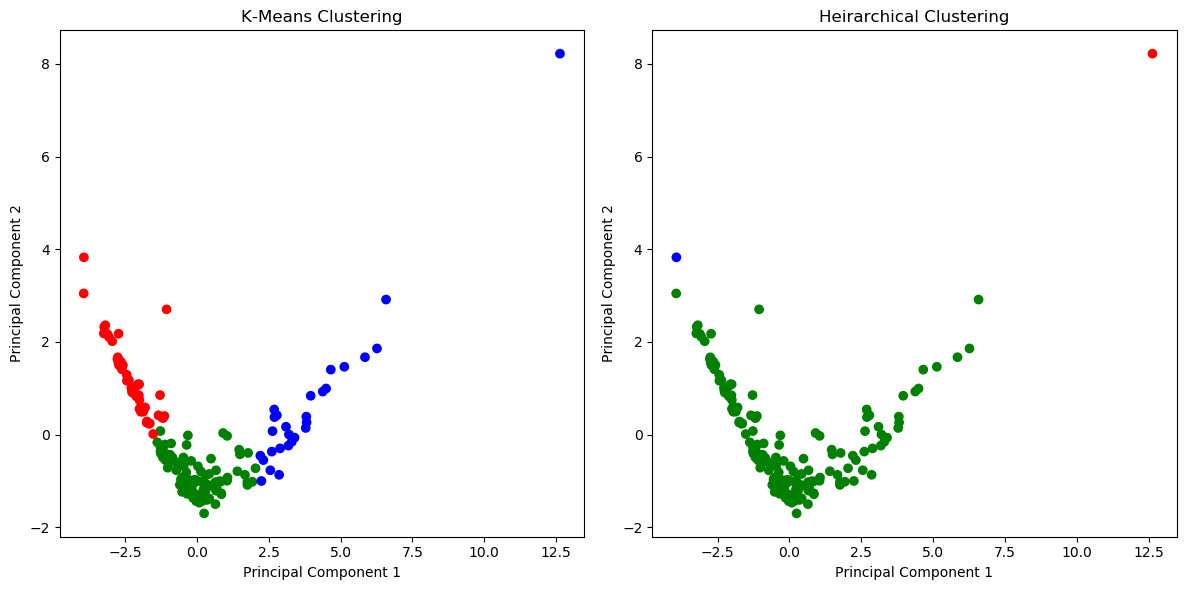

In [61]:
#visualizing principle components for both of algorithms
fig = plt.figure(figsize = (12,6), dpi=100)
plt.subplot(121)
plt.scatter(x=data_pca['PC1'], y=data_pca['PC2'], c = data_pca['K-Means ID'].map({0:'green',1:'red',2:'blue'}))
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(122)
plt.scatter(x=data_pca['PC1'], y=data_pca['PC2'], c = data_pca['Heirarchical ID'].map({0:'green',1:'red',2:'blue'}))
plt.title('Heirarchical Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

As we can see from above first 2 principle component plots, K-Means gives best clusters. Lets see some more plots and decide finally.

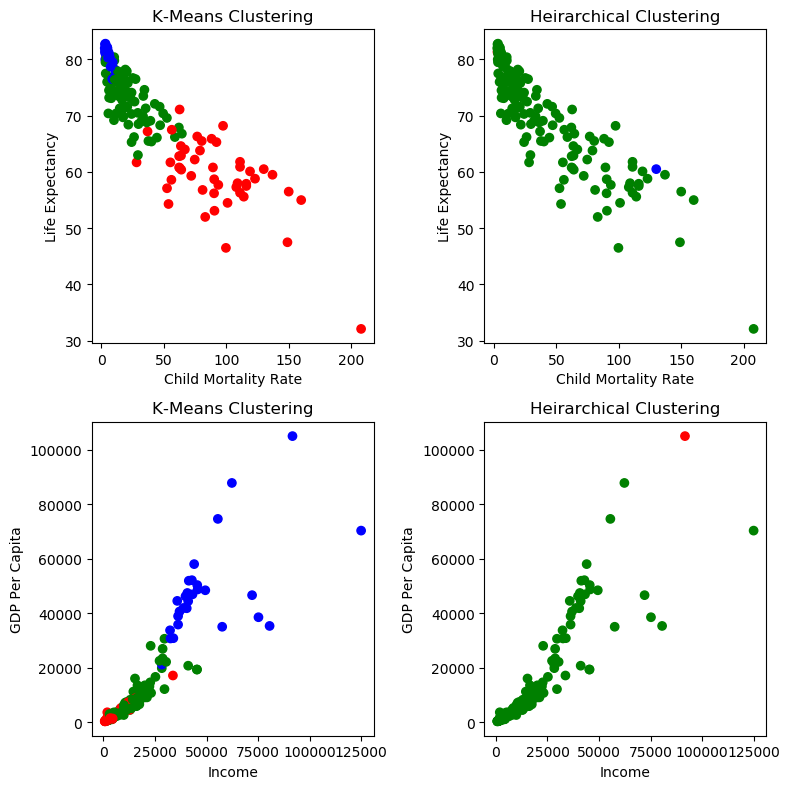

In [62]:
fig = plt.figure(figsize = (8,8), dpi=100)
plt.subplot(221)
plt.scatter(x=country['child_mort'], y=country['life_expec'], c = country['K-Means ID'].map({0:'green',1:'red',2:'blue'}))
plt.title('K-Means Clustering')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Life Expectancy')
plt.subplot(222)
plt.scatter(x=country['child_mort'], y=country['life_expec'], c = country['Heirarchical ID'].map({0:'green',1:'red',2:'blue'}))
plt.title('Heirarchical Clustering')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Life Expectancy')
plt.subplot(223)
plt.scatter(x=country['income'], y=country['gdpp'], c = country['K-Means ID'].map({0:'green',1:'red',2:'blue'}))
plt.title('K-Means Clustering')
plt.xlabel('Income')
plt.ylabel('GDP Per Capita')
plt.subplot(224)
plt.scatter(x=country['income'], y=country['gdpp'], c = country['Heirarchical ID'].map({0:'green',1:'red',2:'blue'}))
plt.title('Heirarchical Clustering')
plt.xlabel('Income')
plt.ylabel('GDP Per Capita')
plt.tight_layout()
plt.show()

As we can see from above plots of K-Means Algorithm gives better picture of variables and able to cluster countries in best possible way. So we will go ahead with our analysis by taking the clusters formed by K-Means Clustring.

## Analysis of Results

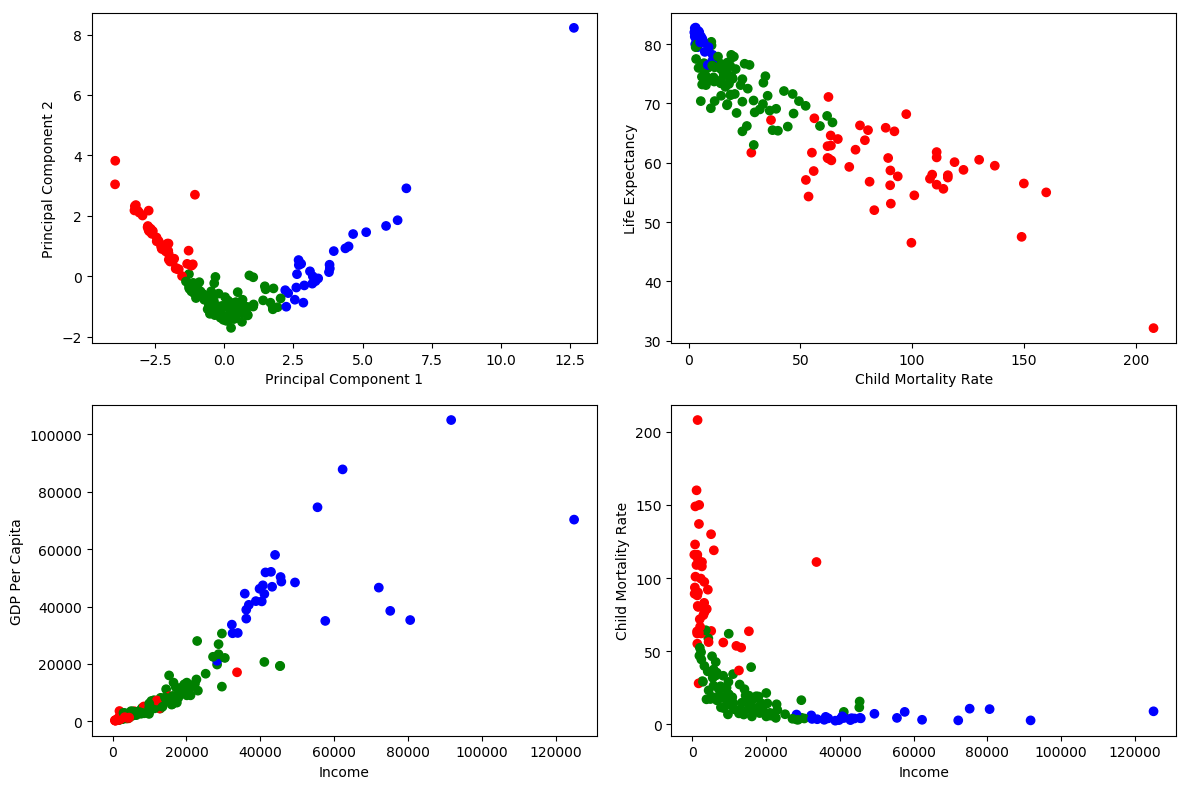

In [63]:
#Visualizing Scatterplots
fig = plt.figure(figsize = (12,8), dpi=100)
plt.subplot(221)
plt.scatter(x=data_pca['PC1'], y=data_pca['PC2'], c = data_pca['K-Means ID'].map({0:'green',1:'red',2:'blue'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.subplot(222)
plt.scatter(x=country['child_mort'], y=country['life_expec'], c = country['K-Means ID'].map({0:'green',1:'red',2:'blue'}))
plt.xlabel('Child Mortality Rate')
plt.ylabel('Life Expectancy')
plt.subplot(223)
plt.scatter(x=country['income'], y=country['gdpp'], c = country['K-Means ID'].map({0:'green',1:'red',2:'blue'}))
plt.xlabel('Income')
plt.ylabel('GDP Per Capita')
plt.subplot(224)
plt.scatter(x=country['income'], y=country['child_mort'], c = country['K-Means ID'].map({0:'green',1:'red',2:'blue'}))
plt.xlabel('Income')
plt.ylabel('Child Mortality Rate')
plt.tight_layout()
plt.show()

Cluster 0 : Green <br>
Cluster 1 : Red <br>
Cluster 2 : Blue <br>

As we can see from the above 4 charts, we can make following conclusions:
- Loadings of first two principle components are very low in cluster 1 countries and high in Cluster 2 countries.
- Countries in Cluster 1 has high Child Mortality Rate and Low Life Expectancy.
- Countries in Cluster 1 has low income and GDP Per Capita

So , HELP should invest in cluster 1 countries because important socio-economic indicators are very low as compared to other countries and they are in dire need of aid. <br>
Lets Analyse some box plots and conclude our results.


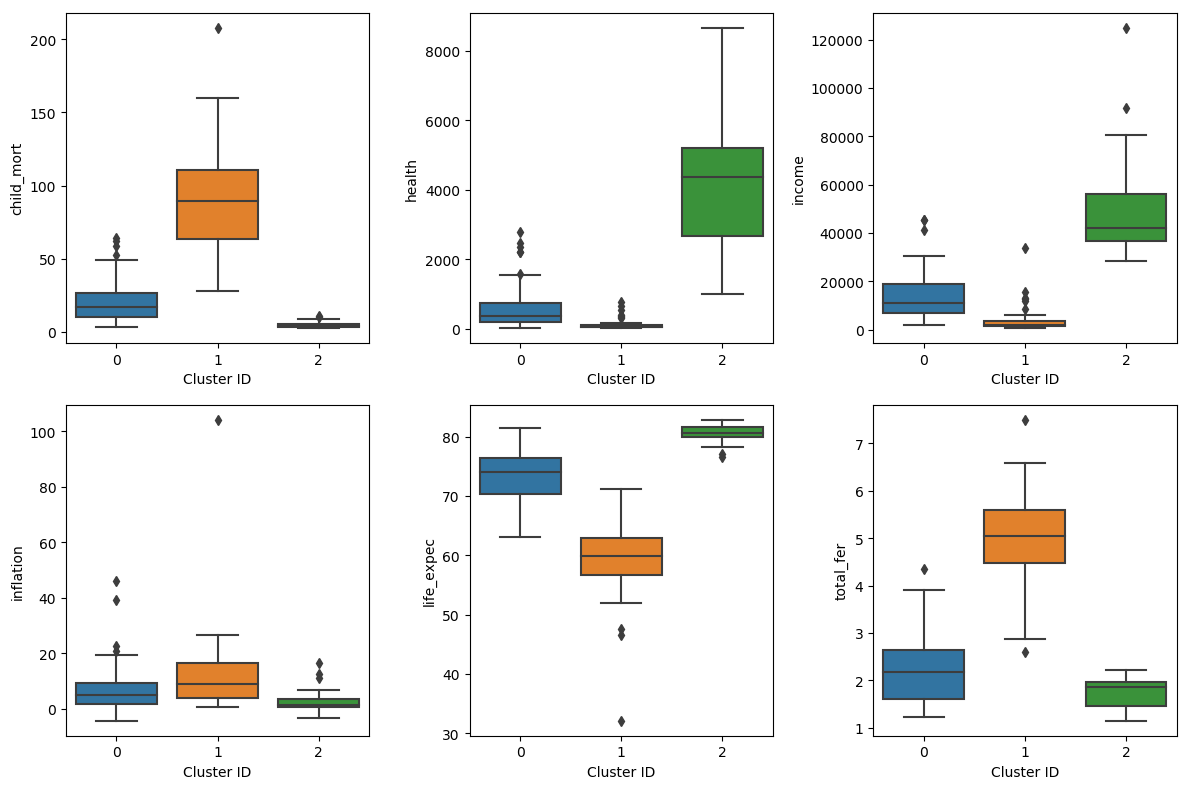

In [64]:
#Analysing Box-plots
plt.figure(figsize=(12,8), dpi=100)
cols = ['child_mort', 'health', 'income','inflation','life_expec','total_fer']
i = 1
for col in cols:
    plt.subplot(2,3,i)
    sns.boxplot(y=country[col], x=country['K-Means ID'])
    plt.ylabel(col)
    plt.xlabel('Cluster ID')
    i=i+1
plt.tight_layout()
plt.show()

As we can see from the above boxplots, we are getting same patterns for clusters we got in scatterplots.<br>
We can see the countries in cluster 1 are lagging in almost every social/economic Indicator. We can see countries in cluster 1 have
- Very High Child Mortality Rate
- Low Spendings on Health
- Low Income Per Person
- High Inflation
- Very Low Life Expectancy
- High Fertilty 

So HELP should focus on Cluster 1 countries and run some good projects to increase the life quality and imporove social economic indicators.

## Final Results : List of Countries which are in direst need of AID

As we have seen from the above analysis , Cluster 1 countries are in dire need of AID. Lets see the data of these countries and find out most critical countries.

In [65]:
#getting Cluster 1 countries
country_for_aid = country[country['K-Means ID'] == 1]

In [66]:
country_for_aid.shape

(48, 13)

As we can see we have 48 countries in the list , let see the data and filter out some countries.

In [67]:
country_for_aid.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_group,K-Means ID,Heirarchical ID
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,Very Poor Income,1,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,Poor Income,1,0
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,Very Poor Income,1,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,Poor Income,1,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,Very Poor Income,1,0


**Binning of Countries**<br>
As we get 48 countries in a cluster on which we have to focus, we will use concept of binning and filter out some countries based on income and child_mort variable.

In [68]:
country_for_aid.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means ID,Heirarchical ID
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,1.0,0.041667
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,1.036192,2925.911009,0.0,0.288675
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,1.0,0.000000
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,1.0,0.000000
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,1.0,0.000000
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,1.0,0.000000
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000,1.0,2.000000


In [69]:
#selecting countries having income less than 4000
HELP = country_for_aid[(country_for_aid['income']) < 4000]

In [70]:
#selecting countries with child_mortality rate greater than 100
HELP = HELP[HELP['child_mort'] >= 100.0]

In [71]:
HELP

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_group,K-Means ID,Heirarchical ID
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,Very Poor Income,1,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,Very Poor Income,1,0
28,Cameroon,108.0,290.820,67.2030,353.700,2660,1.910,57.3,5.11,1310,Very Poor Income,1,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446,Very Poor Income,1,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.390,56.5,6.59,897,Very Poor Income,1,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.800,57.5,6.54,334,Very Poor Income,1,0
40,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.390,56.3,5.27,1220,Very Poor Income,1,0
63,Guinea,109.0,196.344,31.9464,279.936,1190,16.100,58.0,5.34,648,Very Poor Income,1,0
64,Guinea-Bissau,114.0,81.503,46.4950,192.544,1390,2.970,55.6,5.05,547,Very Poor Income,1,0
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.450,32.1,3.33,662,Very Poor Income,1,0


In [72]:
#getting the list of country names 
country_names = list(HELP['country'].values)

In [73]:
#printing the final Country Names which are in dire need of AID
country_names

['Benin',
 'Burkina Faso',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Congo, Dem. Rep.',
 "Cote d'Ivoire",
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Mali',
 'Mozambique',
 'Niger',
 'Sierra Leone']

As we know HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.<br>
HELP should focus on these 14 backward countries and run some projects to increase the quality of Life and improve Socio Economic Indicators.